In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from tqdm import tqdm_notebook

In [11]:
df_train = pd.read_csv('./finance_predict/train.csv')
df_train.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,subscribe
0,1,51,admin.,divorced,professional.course,no,yes,yes,cellular,aug,...,1,112,2,failure,1.4,90.81,-35.53,0.69,5219.74,no
1,2,50,services,married,high.school,unknown,yes,no,cellular,may,...,1,412,2,nonexistent,-1.8,96.33,-40.58,4.05,4974.79,yes
2,3,48,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,...,0,1027,1,failure,-1.8,96.33,-44.74,1.50,5022.61,no
3,4,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,...,26,998,0,nonexistent,1.4,97.08,-35.55,5.11,5222.87,yes
4,5,45,admin.,single,university.degree,no,no,no,cellular,nov,...,1,240,4,success,-3.4,89.82,-33.83,1.17,4884.70,no


In [13]:
df_test = pd.read_csv('./finance_predict/test.csv')
df_test.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed
0,22501,35,technician,single,professional.course,no,yes,yes,cellular,aug,...,3295,1,476,0,success,1.4,95.37,-33.04,3.63,5204.54
1,22502,26,admin.,single,high.school,no,yes,no,cellular,may,...,2872,1,166,2,success,-1.8,91.75,-44.42,3.16,4924.78
2,22503,44,blue-collar,married,basic.6y,no,no,no,telephone,may,...,268,3,968,0,nonexistent,1.1,89.67,-36.90,5.04,4947.02
3,22504,36,blue-collar,married,basic.9y,no,yes,no,telephone,nov,...,30,1,432,5,success,-0.1,89.87,-41.66,3.27,5203.33
4,22505,41,blue-collar,married,basic.4y,no,yes,no,telephone,may,...,1670,1,944,3,success,1.1,97.64,-36.32,3.95,4992.02


In [14]:
# 训练集、测试集合并
df =pd.concat([df_train, df_test], axis=0)
df

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,subscribe
0,1,51,admin.,divorced,professional.course,no,yes,yes,cellular,aug,...,1,112,2,failure,1.4,90.81,-35.53,0.69,5219.74,no
1,2,50,services,married,high.school,unknown,yes,no,cellular,may,...,1,412,2,nonexistent,-1.8,96.33,-40.58,4.05,4974.79,yes
2,3,48,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,...,0,1027,1,failure,-1.8,96.33,-44.74,1.50,5022.61,no
3,4,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,...,26,998,0,nonexistent,1.4,97.08,-35.55,5.11,5222.87,yes
4,5,45,admin.,single,university.degree,no,no,no,cellular,nov,...,1,240,4,success,-3.4,89.82,-33.83,1.17,4884.70,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,29996,49,admin.,unknown,university.degree,unknown,yes,yes,telephone,apr,...,50,302,1,failure,-1.8,95.77,-40.50,3.86,5058.64,NaN
7496,29997,34,blue-collar,married,basic.4y,no,no,no,cellular,jul,...,8,440,3,failure,1.4,90.59,-47.29,1.77,5156.70,NaN
7497,29998,50,retired,single,basic.4y,no,yes,no,cellular,jun,...,3,997,0,nonexistent,-2.9,97.42,-39.69,1.29,5116.80,NaN
7498,29999,31,technician,married,professional.course,no,no,no,cellular,aug,...,3,1028,0,nonexistent,1.4,96.90,-37.68,5.18,5144.45,NaN


In [15]:
from pprint import pprint

# 计算每列的缺失值数量
null_counts = df.isnull().sum()

# 计算每列的唯一值数量
unique_counts = df.nunique()

# 获取每列的数据类型
data_types = df.dtypes

# 将结果合并成一个DataFrame
results_df = pd.DataFrame({
    'Null Counts': null_counts,
    'Unique Counts': unique_counts,
    'Data Types': data_types
})

# 输出结果
pprint(results_df)

                  Null Counts  Unique Counts Data Types
id                          0          30000      int64
age                         0             86      int64
job                         0             12     object
marital                     0              4     object
education                   0              8     object
default                     0              3     object
housing                     0              3     object
loan                        0              3     object
contact                     0              2     object
month                       0             10     object
day_of_week                 0              5     object
duration                    0           4692      int64
campaign                    0             58      int64
pdays                       0           1049      int64
previous                    0              7      int64
poutcome                    0              3     object
emp_var_rate                0             10    

In [16]:
from sklearn.preprocessing import LabelEncoder

job_le = LabelEncoder()
df['job_number'] = job_le.fit_transform(df['job'])
df['job_number'].value_counts()

job_number
0     7383
1     6506
9     4731
7     2834
4     2164
5     1335
2     1158
6     1123
3      848
10     844
8      716
11     358
Name: count, dtype: int64

In [17]:
df['marital'].value_counts()
df['marital_number'] = df['marital'].map({'unknown': 0, 'single': 1, 'married': 2, 'divorced': 3})
df['marital_number'].value_counts()

marital_number
2    17604
1     8417
3     3528
0      451
Name: count, dtype: int64

In [18]:
df['education'].value_counts()

education
university.degree      8709
high.school            6774
basic.9y               4320
professional.course    3786
basic.4y               3071
basic.6y               1794
unknown                1330
illiterate              216
Name: count, dtype: int64

In [19]:
df['education'].value_counts()
df['education_number'] = df['education'].map({'unknown': 0, 'illiterate': 1, 'basic.4y': 2, 'basic.6y': 3,\
                    'basic.9y': 4, 'high.school': 5, 'university.degree': 6, 'professional.course': 7})
df['education_number'].value_counts()

education_number
6    8709
5    6774
4    4320
7    3786
2    3071
3    1794
0    1330
1     216
Name: count, dtype: int64

In [20]:
#housing	loan	contact	month	day_of_week	poutcome
df['housing'].value_counts()
df['housing_number'] = df['housing'].map({'unknown': 0, 'no': 1, 'yes': 2})
df['housing_number'].value_counts()

housing_number
2    15449
1    13365
0     1186
Name: count, dtype: int64

In [21]:
df['loan_number'] = df['loan'].map({'unknown': 0, 'no': 1, 'yes': 2})
df['loan_number'].value_counts()

loan_number
1    23988
2     4817
0     1195
Name: count, dtype: int64

In [22]:
df['contact_number'] = df['contact'].map({'cellular': 0, 'telephone': 1})
df['contact_number'].value_counts()

contact_number
0    18876
1    11124
Name: count, dtype: int64

In [23]:
# mon: 0, tue: 1, wed: 2, thu: 3, fri: 4
df['day_of_week'].value_counts()
df['day_of_week_number'] = df['day_of_week'].map({'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4})
df['day_of_week_number'].value_counts()

day_of_week_number
3    6315
0    6133
2    5983
1    5891
4    5678
Name: count, dtype: int64

In [32]:
df['poutcome_number'] = df['poutcome'].map({'nonexistent': 0, 'failure': 1, 'success': 2})
df['poutcome_number'].value_counts()

poutcome_number
0    19467
1     5924
2     4609
Name: count, dtype: int64

In [33]:
df['default'].value_counts()
df['default_number'] = df['default'].map({'unknown': 0, 'no': 1, 'yes': 2})
df['default_number'].value_counts()

default_number
1    23015
0     6457
2      528
Name: count, dtype: int64

In [34]:
#df[cat_columns]
df['month_number'] = df['month'].map({'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, \
                 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})
df['month_number'].value_counts()

month_number
5     9648
7     5060
8     4449
6     3857
11    2998
4     2005
10     641
3      545
9      528
12     269
Name: count, dtype: int64

In [35]:
df.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_index',
       'cons_conf_index', 'lending_rate3m', 'nr_employed', 'subscribe',
       'job_number', 'marital_number', 'education_number', 'housing_number',
       'loan_number', 'contact_number', 'day_of_week_number', 'default_number',
       'month_number', 'poutcome_number'],
      dtype='object')

In [38]:
df.head(10)

,id,age,job,marital,education,default,housing,loan,contact,month,...,job_number,marital_number,education_number,housing_number,loan_number,contact_number,day_of_week_number,default_number,month_number,poutcome_number
0,1,51,admin.,divorced,professional.course,no,yes,yes,cellular,aug,...,0,3,7,2,2,0,0,1,8,1
1,2,50,services,married,high.school,unknown,yes,no,cellular,may,...,7,2,5,2,1,0,0,0,5,0
2,3,48,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,...,1,3,4,1,1,0,2,1,4,1
3,4,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,...,2,1,5,2,2,0,4,2,8,0
4,5,45,admin.,single,university.degree,no,no,no,cellular,nov,...,0,1,6,1,1,0,1,1,11,2
5,6,47,management,married,unknown,no,no,no,cellular,jul,...,4,2,0,1,1,0,3,1,7,0
6,7,33,technician,married,high.school,no,yes,no,cellular,aug,...,9,2,5,2,1,0,0,1,8,0
7,8,40,technician,married,basic.9y,yes,no,unknown,cellular,apr,...,9,2,4,1,0,0,0,2,4,2
8,9,47,services,married,high.school,no,no,no,cellular,aug,...,7,2,5,1,1,0,3,1,8,0
9,10,53,housemaid,married,unknown,no,no,no,cellular,aug,...,3,2,0,1,1,0,4,1,8,2


In [46]:
df.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_index',
       'cons_conf_index', 'lending_rate3m', 'nr_employed', 'subscribe',
       'job_number', 'marital_number', 'education_number', 'housing_number',
       'loan_number', 'contact_number', 'day_of_week_number', 'default_number',
       'month_number', 'poutcome_number'],
      dtype='object')

In [52]:
df['subscribe'] = df['subscribe'].map({'no': 0, 'yes': 1})
df['subscribe'].value_counts()

subscribe
0.0    19548
1.0     2952
Name: count, dtype: int64

In [53]:
# 切分数据集
choose = [
    'age', 'job_number', 'marital_number', 'education_number', 'default_number','housing_number',
       'loan_number', 'contact_number', 'month_number', 'day_of_week_number', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome_number', 'emp_var_rate', 'cons_price_index', 'cons_conf_index', 'lending_rate3m', 'nr_employed', 'subscribe'
]
train = df[df['subscribe'].notnull()]
test = df[df['subscribe'].isnull()]
train = train[choose]
test = test[choose]

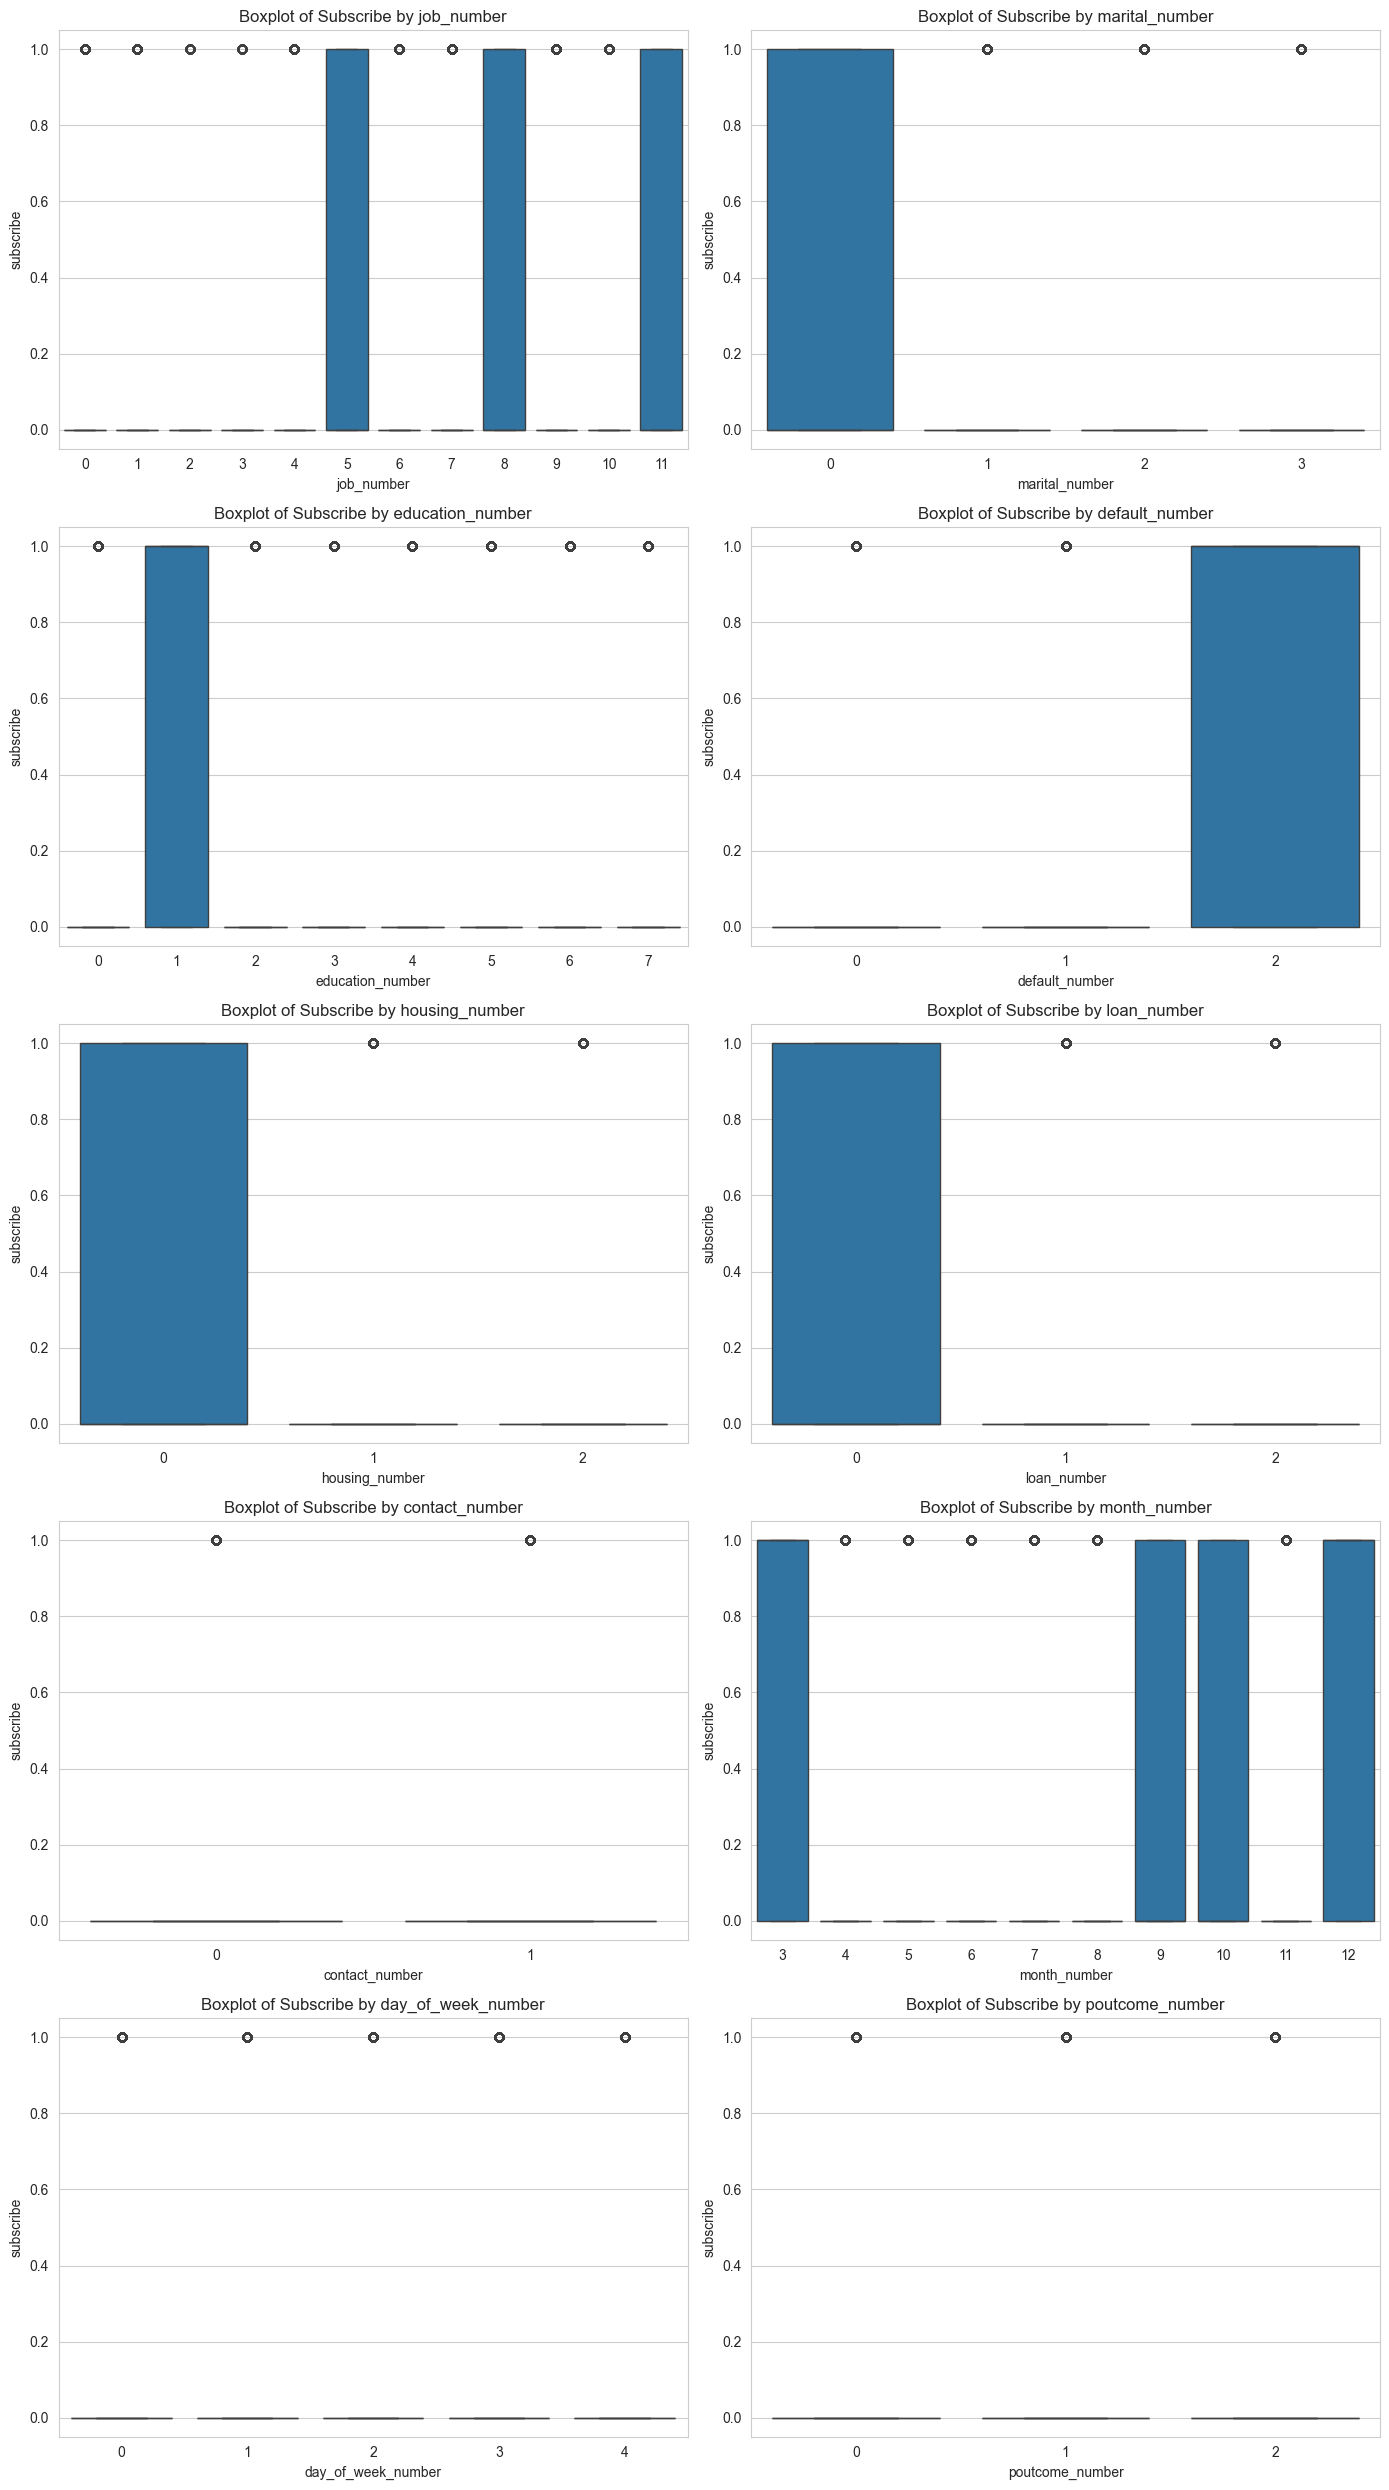

             Variable  Correlation       P-value
0          job_number     0.058814  1.053167e-18
1      marital_number    -0.084383  7.690103e-37
2    education_number    -0.009973  1.346703e-01
3      default_number     0.114684  9.649538e-67
4      housing_number    -0.035042  1.459787e-07
5         loan_number    -0.034152  2.990588e-07
6      contact_number    -0.119293  4.220962e-72
7        month_number     0.054350  3.402914e-16
8  day_of_week_number     0.008621  1.959771e-01
9     poutcome_number     0.096334  1.550523e-47


In [58]:
from scipy.stats import pointbiserialr


# 计算点二列相关系数
# 识别所有离散变量
discrete_vars = ['job_number', 'marital_number', 'education_number', 'default_number','housing_number',
       'loan_number', 'contact_number', 'month_number', 'day_of_week_number', 'poutcome_number']

# 计算点二列相关系数并存储结果
correlation_results = []
for var in discrete_vars:
    corr, p_value = pointbiserialr(train[var], train['subscribe'])
    correlation_results.append({'Variable': var, 'Correlation': corr, 'P-value': p_value})

# 将结果转换为DataFrame
correlation_df = pd.DataFrame(correlation_results)

# 可视化
plt.figure(figsize=(14, 25))
for i, var in enumerate(discrete_vars):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(x=var, y='subscribe', data=train)
    plt.title(f'Boxplot of Subscribe by {var}')
plt.tight_layout()
plt.show()

# 输出汇总表格
print(correlation_df)

In [67]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score
import joblib

# 假设您已经有了数据集 df，其中包含特征和目标变量
# 如果没有，请根据您的实际情况加载数据集

# 分离特征和目标变量
X = train.drop('subscribe', axis=1)
y = train['subscribe']

# 初始化KFold
kf = KFold(n_splits=9, shuffle=True, random_state=42)

# 存储模型
models = []

# 进行五折交叉训练并保存模型
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # 定义逻辑线性回归模型
    model = LogisticRegression(
        penalty="l2",
        dual=False,
        tol=1e-4,
        C=1.0,
        fit_intercept=True,
        intercept_scaling=1,
        class_weight=None,
        random_state=None,
        solver="lbfgs",
        max_iter=1000,
        multi_class="deprecated",
        verbose=0,
        warm_start=False,
        n_jobs=-1,
        l1_ratio=None,
    )

    # 训练模型
    model.fit(X_train, y_train)

    # 预测并计算准确率
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Fold {fold + 1} Accuracy: {accuracy}")

    models.append(model)

# 输出结果
print("Training completed. Five models have been saved.")


Fold 1 Accuracy: 0.8648
Fold 2 Accuracy: 0.8692
Fold 3 Accuracy: 0.8672
Fold 4 Accuracy: 0.8788
Fold 5 Accuracy: 0.8732
Fold 6 Accuracy: 0.8704
Fold 7 Accuracy: 0.864
Fold 8 Accuracy: 0.8708
Fold 9 Accuracy: 0.8704
Training completed. Five models have been saved.


In [68]:
from sklearn.ensemble import VotingClassifier

# 分离特征和目标变量
X_test = test.drop('subscribe', axis=1)

# 使用硬投票法进行预测
voting_clf = VotingClassifier(estimators=[(f'model_{i}', model) for i, model in enumerate(models)], voting='hard')
voting_clf.fit(X, y)  # 使用训练集数据进行拟合
y_pred = voting_clf.predict(X_test)
test['subscribe'] = y_pred

In [69]:
test['subscribe'].value_counts()

subscribe
0.0    7329
1.0     171
Name: count, dtype: int64

In [70]:
test.head()

,age,job_number,marital_number,education_number,default_number,housing_number,loan_number,contact_number,month_number,day_of_week_number,...,campaign,pdays,previous,poutcome_number,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,subscribe
0,35,9,1,7,1,2,2,0,8,0,...,1,476,0,2,1.4,95.37,-33.04,3.63,5204.54,0.0
1,26,0,1,5,1,2,1,0,5,3,...,1,166,2,2,-1.8,91.75,-44.42,3.16,4924.78,0.0
2,44,1,2,3,1,1,1,1,5,0,...,3,968,0,0,1.1,89.67,-36.90,5.04,4947.02,0.0
3,36,1,2,4,1,2,1,1,11,3,...,1,432,5,2,-0.1,89.87,-41.66,3.27,5203.33,0.0
4,41,1,2,2,1,2,1,1,5,3,...,1,944,3,2,1.1,97.64,-36.32,3.95,4992.02,0.0


In [72]:
test['subscribe'] = test['subscribe'].map({0: 'no', 1: 'yes'})
test['subscribe'].value_counts()
#sum(y_pred)
result = pd.read_csv('./finance_predict/submission.csv')
subscribe_map ={1: 'yes', 0: 'no'}
result['subscribe'] = [subscribe_map[x] for x in y_pred]

In [73]:
result.to_csv('./finance_predict/submission_logistics.csv', index=False) # 0.9233

# 其他方法

In [74]:
## 基础工具
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import jn
from IPython.display import display, clear_output
import time

warnings.filterwarnings('ignore')
%matplotlib inline

## 模型预测的
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

## 数据降维处理的
from sklearn.decomposition import PCA,FastICA,FactorAnalysis,SparsePCA

# import lightgbm as lgb
import xgboost as xgb

## 参数搜索和评价的
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [169]:
from typing import Union, Sequence
from collections.abc import Callable
from sklearn.model_selection import KFold
import xgboost as xgb
from xgboost.callback import TrainingCallback, LearningRateScheduler, EvaluationMonitor


class AdaptiveLearningRateCallback(LearningRateScheduler):
    def __init__(self, learning_rates=None, patience=500, decay_rate=0.8):
        if learning_rates is None:
            learning_rates = [0.005]
        super().__init__(learning_rates)
        self.patience = patience
        self.decay_rate = decay_rate
        self.scores = []
        self.best_score = -float('inf')
        self.best_round = 0
        self.current_lr = None

    def after_iteration(self, model, epoch, evals_log):
        score = evals_log['eval']['score'][-1]
        self.scores.append(score)

        if score > self.best_score:
            self.best_score = score
            self.best_round = epoch
        elif epoch - self.best_round >= self.patience:
            if self.current_lr is None:
                self.current_lr = float(model.attributes().get('learning_rate', '0.005'))  # 初始学习率
            new_lr = self.current_lr * self.decay_rate
            model.set_attr(learning_rate=str(new_lr))
            print(f"Decayed learning rate to {new_lr} at epoch {epoch}")
            self.best_round = epoch  # Reset patience counter
            self.current_lr = new_lr
        return False


class CustomEvaluationMonitor(EvaluationMonitor):
    def __init__(self, period=100, show_stdv=True):
        super().__init__(period=period, show_stdv=show_stdv)

    def after_iteration(self, model, epoch, evals_log):
        if epoch % self.period == 0:
            for name, keywords in evals_log.items():
                if self.show_stdv:
                    logloss = keywords["logloss"][-1]
                    acc = keywords['score'][-1]
                    print(f"[{epoch}] eval-logloss:{logloss :.4f} acc:{acc}")
                else:
                    pass
        return False


# calculate_metrics函数用于计算评估指标
def calculate_metrics_xgboost(preds, data):
    y_pred = np.array([1 if p > 0.5 else 0 for p in preds])
    y_true = data.get_label()
    # print(y_pred, y_true)
    return "score", accuracy_score(y_true, y_pred)  # True表示分数越低越好

In [170]:
# train函数用于训练模型
def train_K_XGBOOST(feats,
            n_splits: int = 5):
    # 定义k折交叉验证
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    # 开始k折交叉验证
    xgbs = []
    scores = []
    for fold, (train_idx, val_idx) in enumerate(
        kf.split(feats.iloc[:, :]), 1
    ):
        # 准备训练集和验证集
        X_train, X_val = feats.iloc[train_idx, :-1], feats.iloc[val_idx, :-1]
        y_train, y_val = feats.iloc[train_idx, -1], feats.iloc[val_idx, -1]
        # weight_ls = [1 / n_splits] * n_splits

        # 创建XGBoost数据集
        train_data = xgb.DMatrix(X_train, label=y_train)
        val_data = xgb.DMatrix(X_val, label=y_val)

        boost_round = 10000
        early_stop_rounds = int(boost_round * 0.2)

        # 设置XGBoost参数
        params = {
            "booster": "gbtree",
            "objective": "binary:logistic",  # 修改为二元分类任务的目标函数
            "eval_metric": "logloss",  # 修改为二元分类任务的评估指标
            "max_depth": 5,
            "min_child_samples": 3,
            "n_estimators": 2 * 11 - 1,
            'gamma': 0,
            "learning_rate": 0.005,
            "subsample": 1,
            "colsample_bytree": 1,
            "reg_alpha": 0.25,
            "reg_lambda": 0.25,
            "random_state": 2022,
            "verbosity": 1,
        }

        # model_xgb = xgb.XGBClassifier(
        #     max_depth=5,  # 树的最大深度
        #     learning_rate=0.005,  # 学习率
        #     n_estimators=2**11 - 1,  # 树的数量
        #     objective='binary:logistic',  # 二元分类任务的目标函数
        #     booster='gbtree',  # 使用树模型
        #     subsample=1,  # 训练样本采样比例
        #     colsample_bytree=1,  # 特征采样比例
        #     reg_alpha=0.25,  # L1正则化系数
        #     reg_lambda=0.25,  # L2正则化系数
        #     random_state=2022,  # 随机种子
        #     verbosity=1,  # 日志级别
        # )
        # xgr = xgb.XGBRegressor(n_estimators=120, learning_rate=0.1, gamma=0, subsample=0.8,\
        # colsample_bytree=0.9, max_depth=7) #,objective ='reg:squarederror'

        # 在训练时使用自适应学习率回调函数
        patience, decay_rate = 5000, 0.5 # 数据为样例，并非真实情况
        adaptive_lr = AdaptiveLearningRateCallback(decay_rate=decay_rate, patience=patience) # 学习率适应法，如果分数没有上升的话，学习率会根据 lr * decay_rate 进行调整，也就是超过500EPOCH没有提升的话，学习率会衰减为原来的decay_rate倍
        log = CustomEvaluationMonitor(period=40, show_stdv=True)

        # 训练模型
        xgb_one = xgb.train(
            params,
            train_data,
            num_boost_round=boost_round,
            evals=[(val_data, 'eval')],
            custom_metric=calculate_metrics_xgboost,
            callbacks=[xgb.callback.EarlyStopping(early_stop_rounds, maximize=True), adaptive_lr, log],
            verbose_eval=False
        )

        valid_score = xgb_one.best_score
        print(f"best_valid_score on {fold} model: {valid_score}")
        xgbs.append(xgb_one)
        scores.append(valid_score)

    return xgbs, scores

In [171]:
xgb_X_data = X
xgb_X_data['subscribe'] = [int(y) for y in y]
xgb_X_data

,age,job_number,marital_number,education_number,default_number,housing_number,loan_number,contact_number,month_number,day_of_week_number,...,campaign,pdays,previous,poutcome_number,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,subscribe
0,51,0,3,7,1,2,2,0,8,0,...,1,112,2,1,1.4,90.81,-35.53,0.69,5219.74,0
1,50,7,2,5,0,2,1,0,5,0,...,1,412,2,0,-1.8,96.33,-40.58,4.05,4974.79,1
2,48,1,3,4,1,1,1,0,4,2,...,0,1027,1,1,-1.8,96.33,-44.74,1.50,5022.61,0
3,26,2,1,5,2,2,2,0,8,4,...,26,998,0,0,1.4,97.08,-35.55,5.11,5222.87,1
4,45,0,1,6,1,1,1,0,11,1,...,1,240,4,2,-3.4,89.82,-33.83,1.17,4884.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,33,0,2,5,1,1,1,0,8,4,...,3,925,3,1,-2.9,92.47,-43.30,3.36,5203.22,1
22496,34,0,3,5,1,0,0,0,8,4,...,14,533,3,1,1.4,93.64,-26.27,4.41,4914.80,0
22497,25,0,2,7,1,2,1,0,5,3,...,0,792,5,2,-1.8,90.43,-36.75,4.05,5114.30,0
22498,57,5,2,5,1,2,1,1,5,1,...,5,989,0,0,1.1,89.38,-37.96,4.95,5284.43,0


In [173]:
xgbs, scores = train_K_XGBOOST(xgb_X_data, n_splits=7)

[0] eval-logloss:0.3976 acc:0.869362
[40] eval-logloss:0.3628 acc:0.869362
[80] eval-logloss:0.3384 acc:0.869362
[120] eval-logloss:0.3205 acc:0.869362
[160] eval-logloss:0.3069 acc:0.873406
[200] eval-logloss:0.2966 acc:0.875583
[240] eval-logloss:0.2885 acc:0.875583
[280] eval-logloss:0.2825 acc:0.876516
[320] eval-logloss:0.2775 acc:0.876827
[360] eval-logloss:0.2737 acc:0.87776
[400] eval-logloss:0.2710 acc:0.876516
[440] eval-logloss:0.2687 acc:0.87776
[480] eval-logloss:0.2670 acc:0.879938
[520] eval-logloss:0.2654 acc:0.880249
[560] eval-logloss:0.2642 acc:0.880871
[600] eval-logloss:0.2631 acc:0.881493
[640] eval-logloss:0.2621 acc:0.882115
[680] eval-logloss:0.2613 acc:0.882426
[720] eval-logloss:0.2605 acc:0.882426
[760] eval-logloss:0.2596 acc:0.883359
[800] eval-logloss:0.2589 acc:0.883359
[840] eval-logloss:0.2582 acc:0.88367
[880] eval-logloss:0.2579 acc:0.88367
[920] eval-logloss:0.2578 acc:0.882737
[960] eval-logloss:0.2575 acc:0.882737
[1000] eval-logloss:0.2573 acc:0.

In [174]:
scores

[0.886159, 0.883981, 0.886434, 0.89079, 0.88239, 0.890479, 0.881456]

In [175]:
np.mean(scores)

0.8859555714285714

In [196]:
from typing import List


def ensemble_predict_xgbs(models: List[xgb.XGBRegressor], X):
    """
    使用集成模型进行预测。

    :param models: 训练好的模型列表
    :param X: 测试数据集
    :return: 集成模型的预测结果
    """
    preds = np.zeros((X.shape[0], len(models)))

    for i, model in enumerate(models):
        dmatrix = xgb.DMatrix(X)
        # print(best_iteration, best_score)
        one = model.predict(dmatrix)
        preds[:, i] = one

    # 对所有模型的预测结果取平均值
    final_preds = np.mean(preds, axis=1)
    final_preds = [1 if p > 0.5 else 0 for p in final_preds]
    return final_preds

In [197]:
# 分离特征和目标变量
X_test = test.drop('subscribe', axis=1)

# 使用硬投票法进行预测  # 使用训练集数据进行拟合
y_pred = ensemble_predict_xgbs(xgbs, X_test)
test['subscribe'] = y_pred

In [198]:
test['subscribe'].value_counts()

subscribe
0    6976
1     524
Name: count, dtype: int64

In [199]:
test['subscribe'] = test['subscribe'].map({0: 'no', 1: 'yes'})

In [200]:
result = pd.read_csv('./finance_predict/submission.csv')
subscribe_map ={1: 'yes', 0: 'no'}
result['subscribe'] = [subscribe_map[x] for x in y_pred]

In [201]:
result['subscribe'].value_counts()

subscribe
no     6976
yes     524
Name: count, dtype: int64

In [203]:
result.to_csv('./finance_predict/submission_xgboost.csv', index=False) # 0.9648

In [204]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(
    max_depth=5,  # 树的最大深度
    learning_rate=0.005,  # 学习率
    n_estimators=2**11 - 1,  # 树的数量
    objective='binary:logistic',  # 二元分类任务的目标函数
    booster='gbtree',  # 使用树模型
    subsample=1,  # 训练样本采样比例
    colsample_bytree=1,  # 特征采样比例
    reg_alpha=0.25,  # L1正则化系数
    reg_lambda=0.25,  # L2正则化系数
    random_state=2022,  # 随机种子
    verbosity=1,  # 日志级别
)
model_xgb.fit(X.drop('subscribe', axis=1), y)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2047, n_jobs=None,
              num_parallel_tree=None, random_state=2022, ...)

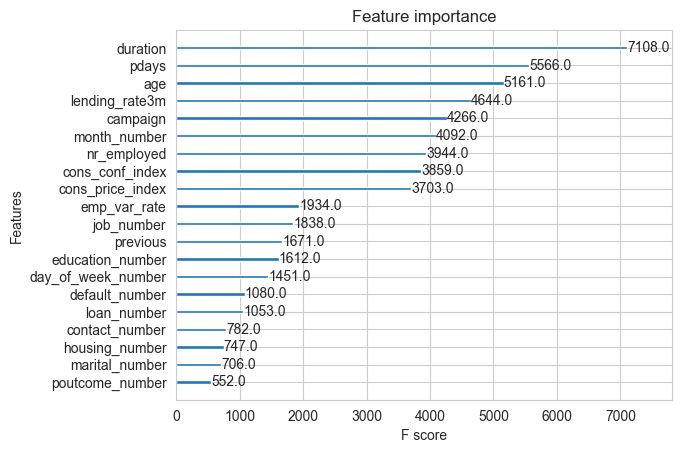

In [205]:
from xgboost import plot_importance
plot_importance(model_xgb)
plt.show()

In [206]:
y_pred = model_xgb.predict(test.drop('subscribe', axis=1))
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [207]:
#sum(y_pred)
result = pd.read_csv('./finance_predict/submission.csv')
subscribe_map ={1: 'yes', 0: 'no'}
result['subscribe'] = [subscribe_map[x] for x in y_pred]
result.to_csv('./finance_predict/finasubmission_xgboost_2.csv', index=False) # 0.9644
result['subscribe'].value_counts()

subscribe
no     7013
yes     487
Name: count, dtype: int64